![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Unsupervised Learning Project Part A
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


# • DOMAIN: Automobile
> **• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.**

> **• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.**

In [34]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
import math
import warnings
from scipy.stats import zscore
warnings.filterwarnings("ignore")
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Loading Data</div>

In [2]:
df1 = pd.read_csv('Car name.csv')

In [3]:
df2 = pd.read_json('Car-Attributes.json')

In [4]:
df1

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [5]:
df2

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Joining both data sets</div>

In [11]:
df = pd.concat([df1,df2], axis=1).reindex(df1.index)

In [12]:
df.head(50)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">feature-wise percentage of missing values  and checking for unexpected values</div>

In [15]:
df[['hp']] = df[['hp']].replace("?", np.nan)

In [16]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [18]:
df. isnull(). sum() * 100 / len(df)

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [20]:
df.hp = pd.to_numeric(df.hp)
df[['hp']] = df[['hp']].replace(np.nan,df.hp.median())

In [22]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">5 point summary of the numerical features </div>

In [23]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.5,23.0,29.0,46.6
cyl,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.0,4.0,8.0,8.0
disp,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.25,148.5,262.0,455.0
hp,398.0,NaN,NaN,NaN,104.30402,38.222625,46.0,76.0,93.5,125.0,230.0
wt,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.75,2803.5,3608.0,5140.0
acc,398.0,NaN,NaN,NaN,15.56809,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,NaN,NaN,NaN,76.01005,3.697627,70.0,73.0,76.0,79.0,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.0,1.0,2.0,3.0


> **Mean and Std of all the features differ significantly its very high for wt and low for origin**

> **there total 398 separate entries**

> **from above statiscal description we check all three quartile values min and max values for all the features**


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Checking for Duplicate Values</div>

In [25]:
len(df[df.duplicated()])

0

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">A pairplot for all features</div>

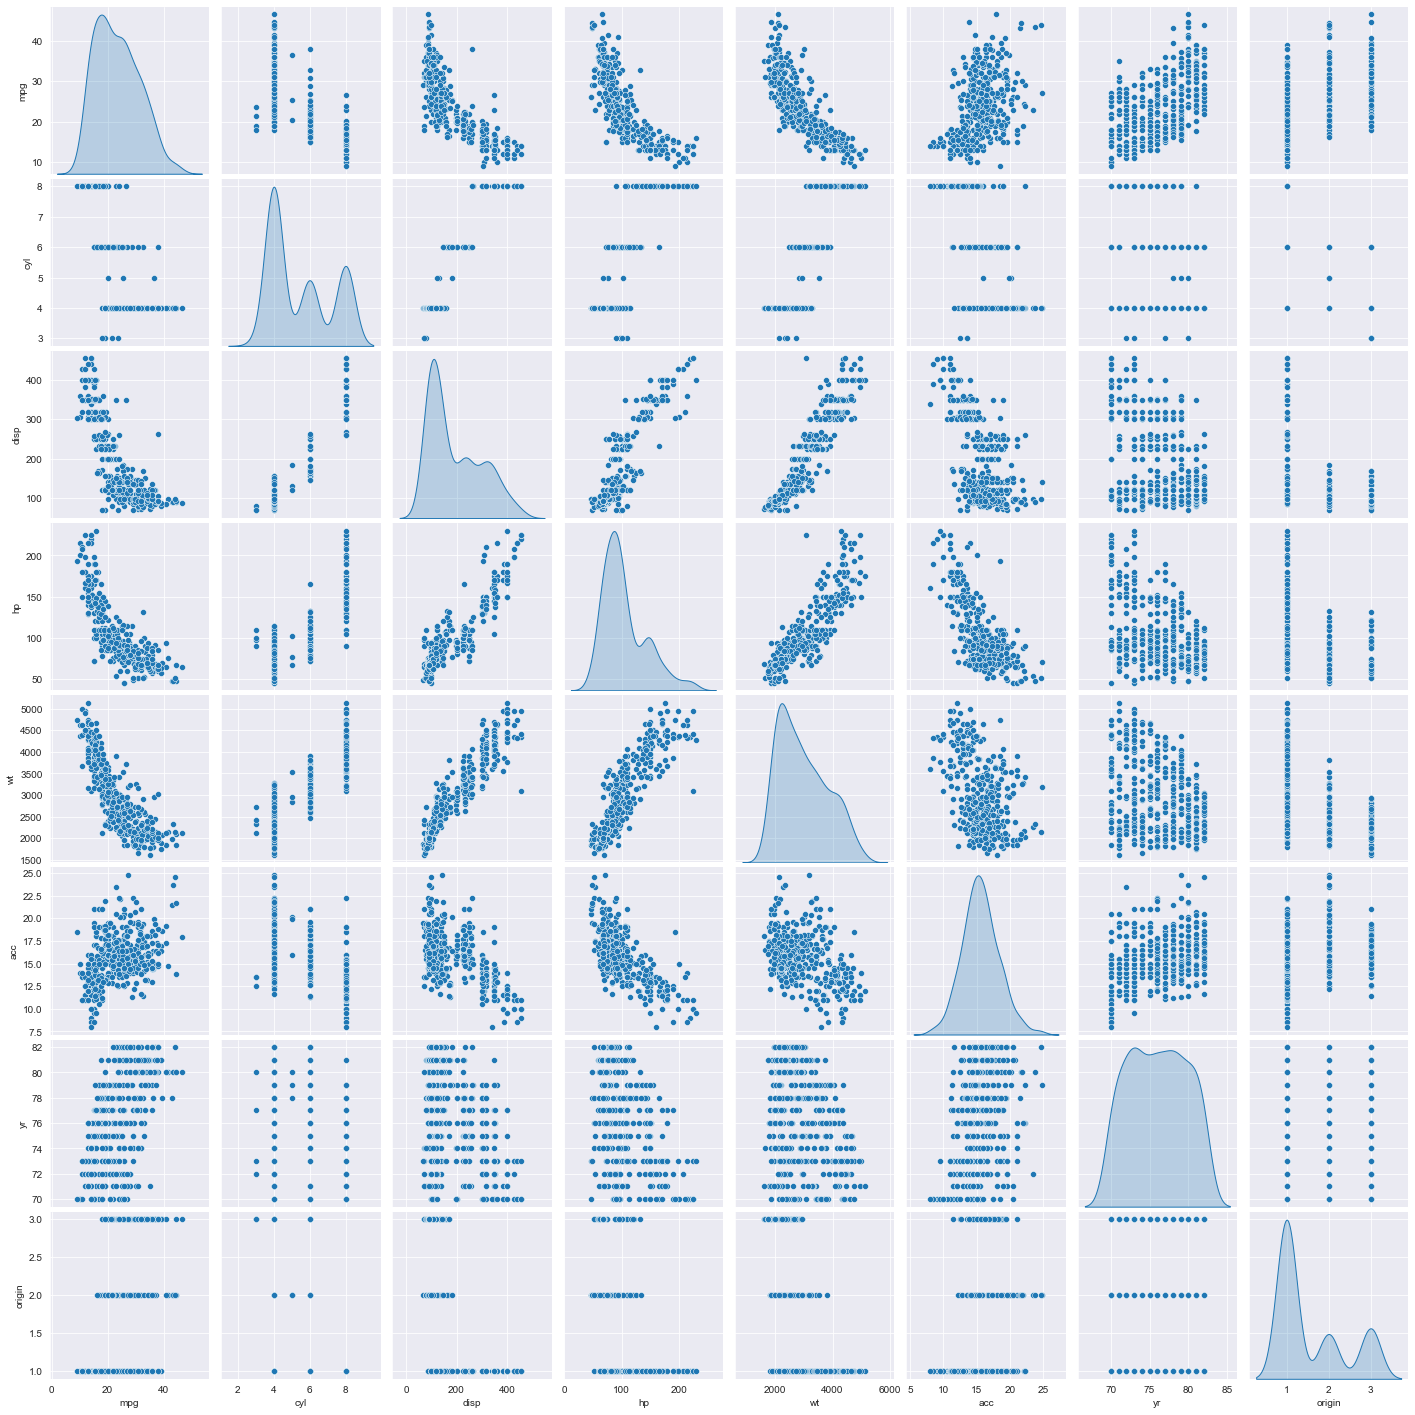

In [26]:
sns.pairplot(df, diag_kind = 'kde');

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Scatter Plot</div>

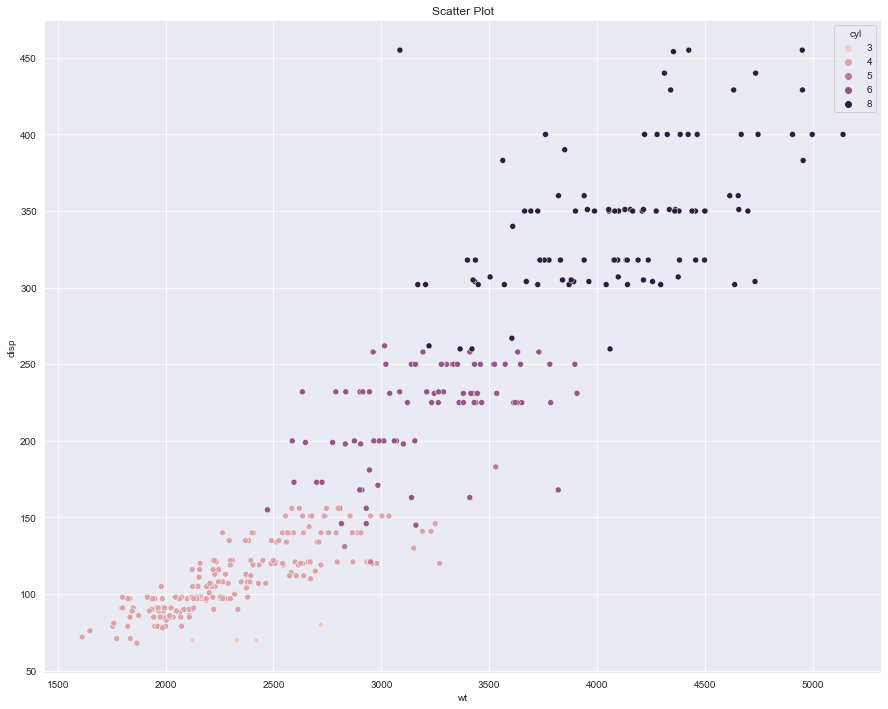

In [27]:
plt.figure(figsize=(15,12))
plt.title('Scatter Plot')
sns.scatterplot(data=df,x='wt',y='disp',hue='cyl');

> **There is +ve correlation btween wt and disp**

> **As seen above as weight and disp are less the no of cyl are also less**

> **As weight and disp increses the cyl also increases**

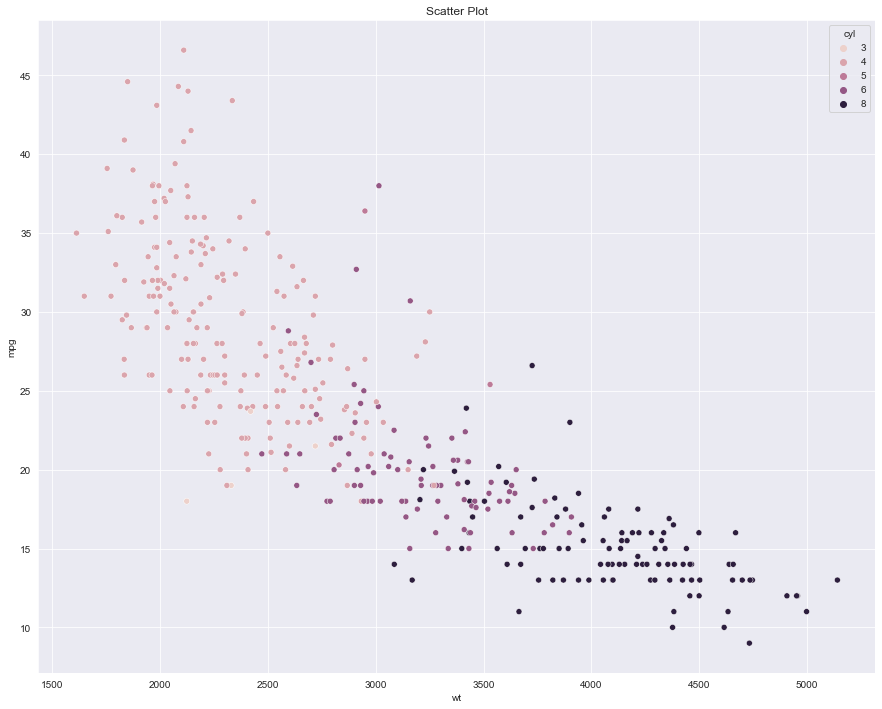

In [28]:
plt.figure(figsize=(15,12))
plt.title('Scatter Plot')
sns.scatterplot(data=df,x='wt',y='mpg',hue='cyl');

> **There is -ve correlation btween wt and mpg**

> **As seen above when  weight is less  mpg is more and the no of cyl are also less**

> **As weight increses  mpg decreases and the cyl numbers increases**

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Encoding Categorical Variable </div>

In [31]:
one_hot = pd.get_dummies(df['origin'])
one_hot = one_hot.add_prefix('origin_')
new_df = df.join(one_hot)
new_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,origin_1,origin_2,origin_3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0


In [32]:
# Let us now remove duplicate/irrelevant columns

df_new = new_df.drop(['yr','origin','car_name'], axis =1)

df_new.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1,0,0


In [35]:
# Now let us try to scale the variables using zscore

# Check datatypes of columns
df_new.dtypes

# Choose numeric columns from the dataframe
numeric_cols = df_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols

# Apply zscore to numeric columns
df_new[numeric_cols] =df_new[numeric_cols].apply(zscore)

# Display transformed dataframe
df_new.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1,0,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1,0,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1,0,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1,0,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1,0,0


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">K-Means clustering</div>

In [36]:
# Apply K-Means clustering for 2 to 10 clusters
# Define number of clusters in the form of range
cluster_range = range(2,11)

# Create empty list for storing cluster errors
cluster_errors = []

#Create Cluster
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,2,1128.881792
1,3,771.065934
2,4,645.934814
3,5,568.894467
4,6,510.305085
5,7,467.304417
6,8,420.186819
7,9,391.012676
8,10,365.971512


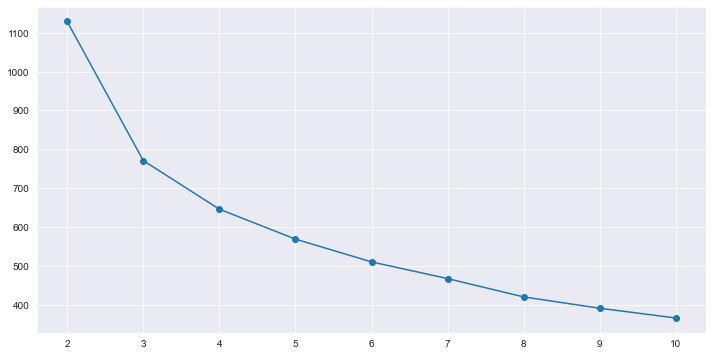

In [40]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

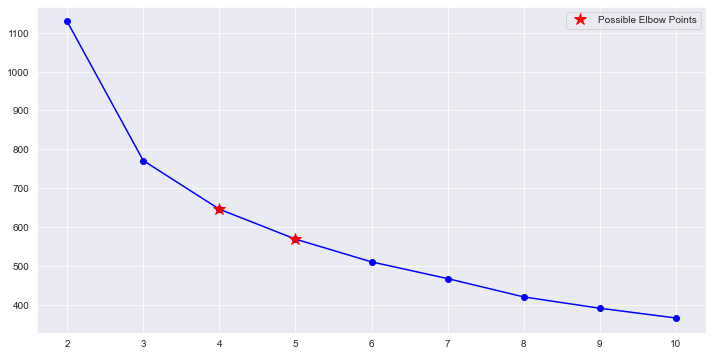

In [59]:
#Plot the figure
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, 'bo-')

# Highlight the possible elbow points in the same figure
plt.plot([4, 5],[645.654455, 570.377856],'r*', markersize=12, label='Possible Elbow Points')
plt.legend(loc = 'best')
plt.show()

>> **From Elbow Method it is Clear that we have 4 Clusters**

In [61]:
# Create a model with 5 clusters
kmeans_5 = KMeans(n_clusters=5, n_init = 5, random_state=12345)
kmeans_5.fit(df_new)

KMeans(n_clusters=5, n_init=5, random_state=12345)

In [63]:
# Import silhouette score library
from sklearn.metrics import silhouette_samples, silhouette_score

# Create labels
labels = kmeans_5.labels_

# Calculating silhouette_score
silhouette_score(df_new,labels)

0.3415384145993931

In [64]:
# Create a model with 4 clusters
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=10)
kmeans.fit(df_new)

KMeans(n_clusters=4, n_init=5, random_state=10)

In [66]:
# Create labels
labels = kmeans.labels_

# Calculating silhouette_score
silhouette_score(df_new,labels)

0.3390451334883318

In [68]:
# Create a model with 3 clusters
kmeans_3 = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans_3.fit(df_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [70]:
# Create labels
labels = kmeans_3.labels_

# Calculating silhouette_score
silhouette_score(df_new,labels)

0.3390451334883318

**The optimal number of clusters should be 4 based on the silhouette score. At 4 there is a sharp drop in the silhouette score.**

In [71]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 97 132  84  85]


In [ ]:
labels = kmeans_3.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

In [73]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_new) )
centroid_df.transpose()

,0,1,2,3
mpg,-1.151105e+00,0.338482,1.300981,-0.497705
cyl,1.486055e+00,-0.816187,-0.835298,0.397111
disp,1.484507e+00,-0.705332,-0.934625,0.324883
hp,1.506241e+00,-0.413299,-0.984524,-0.104117
wt,1.387534e+00,-0.605388,-0.996796,0.341780
acc,-1.062679e+00,-0.044802,0.884704,0.407982
origin_1,1.000000e+00,0.454545,0.154762,0.929412
origin_2,-2.775558e-16,0.325758,0.273810,0.047059
origin_3,1.110223e-16,0.219697,0.571429,0.023529


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Adding a new feature in the DataFrame which will have labels based upon cluster value</div>

In [75]:
# Add cluster number to original cars data

predictions = kmeans.predict(df_new)
predictions
df["group"] = predictions
df['group'] = df['group'].astype('category')
df.dtypes

car_name      object
mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
group       category
dtype: object

In [79]:
# Visualize the new dataframe
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,1


In [82]:
# Check the groups created
df['group'].value_counts().sort_index()

0     97
1    132
2     84
3     85
Name: group, dtype: int64

In [84]:
# Group the clusters
df_analysis = (df.groupby(['group'],axis=0)).head()
df_analysis

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,group
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,3,1
15,plymouth duster,22.0,6,198.0,95.0,2833,15.5,70,1,3
16,amc hornet,18.0,6,199.0,97.0,2774,15.5,70,1,3
17,ford maverick,21.0,6,200.0,85.0,2587,16.0,70,1,3
18,datsun pl510,27.0,4,97.0,88.0,2130,14.5,70,3,1


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Plotting a visual and color the datapoints based upon clusters</div>

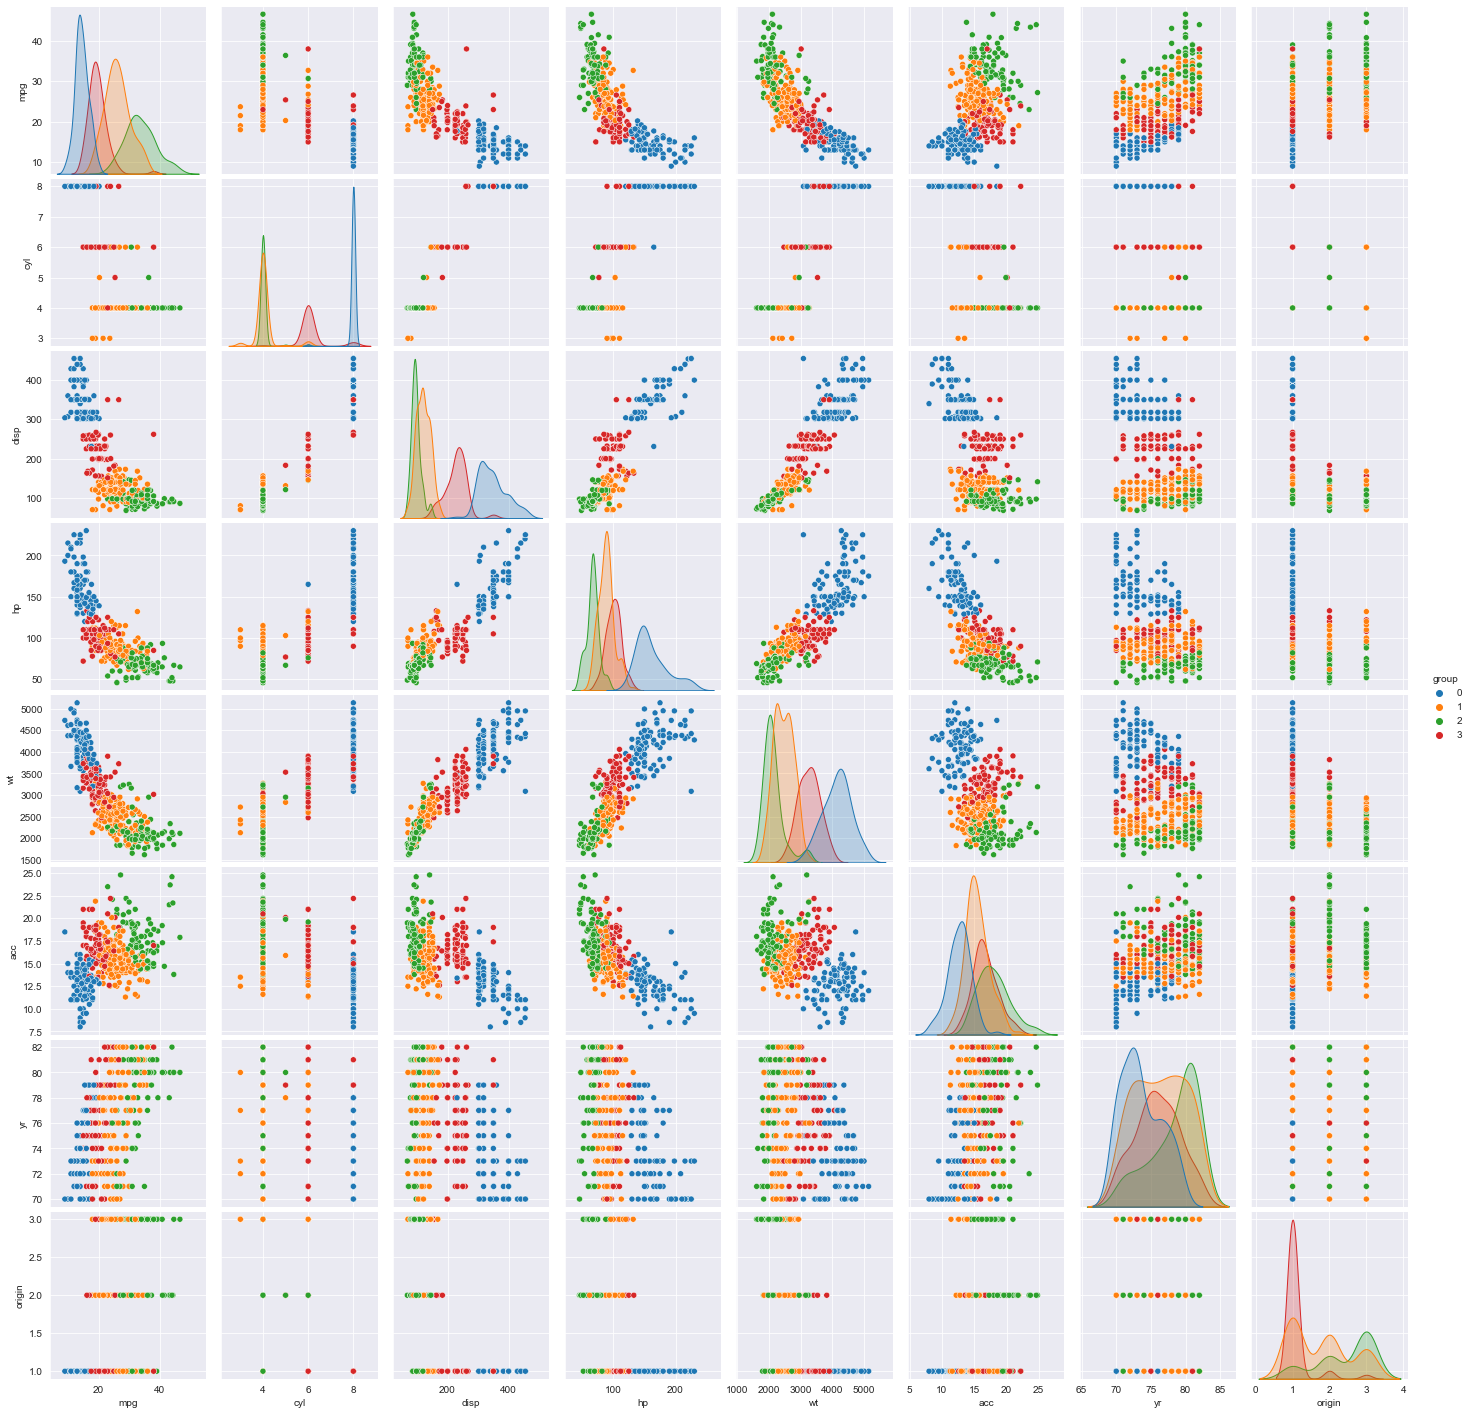

In [112]:
# Plot pairplot with hue as per the identified clusters/group
sns.pairplot(data=df, hue='group', diag_kind = 'kde');

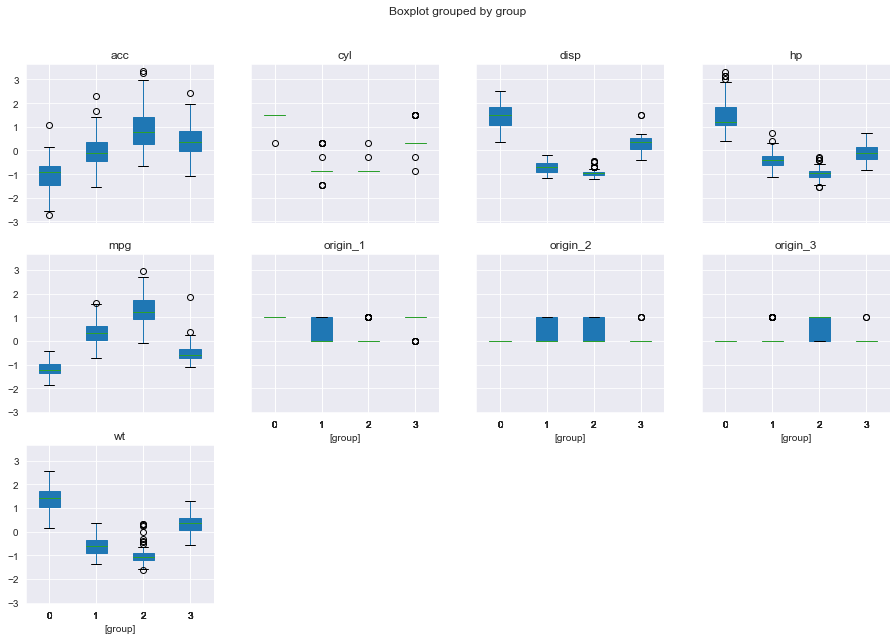

In [87]:
# Visualize the centers

df_new["group"] = predictions
df_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10), patch_artist=True);

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Passing a new DataPoint and predicting which cluster it belongs to.</div>

In [110]:
# Create a new record dataframe
new_record = [[-0.241531,0.856321,-0.370411,-1.448713,0.888443,-1.645441,0,1,0]]
 
# Create the pandas DataFrame
new_record = pd.DataFrame(new_record)
 
# print dataframe.
new_record

,0,1,2,3,4,5,6,7,8
0,-0.241531,0.856321,-0.370411,-1.448713,0.888443,-1.645441,0,1,0


In [111]:
# Predict the cluster for the new record with the trained model

kmeans.predict(new_record)

array([3])

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)